# **Project: Coffee Leaf Quadruple Classifier.**

## About Dataset

A particular data set that we have created for ourselves is a merging of the four datasets BrACoL , JMuBEN, JMuBEN2 , RoCoL , and LiCoLe, we have made several adjustments to fit us and we called the modified dataset is [Dataset_(CLQC)](/content/drive/MyDrive/Dataset_(CLQC)).

For this project, the following tools were used:
- [Tensorflow 2](https://www.tensorflow.org/install) for building and training the model;
- [Numpy](https://numpy.org/) for working with arrays;
- [Matplotlib](https://matplotlib.org/) for visualizing the data.




## Installing and importing dependencies

Let’s start by importing all the necessary libraries.

In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
import seaborn as sns
import os
import keras
import pathlib
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten
from keras.preprocessing.image import ImageDataGenerator
from matplotlib.image import imread
from os import path, environ
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras import layers
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.models import Sequential
import itertools
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import classification_report

## Loading Dataset

I've trained the model using Google Colab. The dataset was uploaded to my Google Drive and mounted it in Colab:

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Data preprocessing
The following steps of the data preprocessing are:
- data Augumentation;
- data samples visualization;


Let’s generate training and validation data using the data generator

In [ ]:
import os
folder = os.path.join('/content/drive/MyDrive/Graduation Project')

In [ ]:
train_path = '/content/drive/MyDrive/Graduation Project/phase 2/‏‏Dataset_CLQC/Dataset/Training_set/Stage_2'
valid_path = '/content/drive/MyDrive/Graduation Project/phase 2/‏‏Dataset_CLQC/Dataset/Testing_or_Validation_set/Stage_2'

train_stage2 = os.path.join(train_path, 'Stage_2')
train_rust = os.path.join(train_stage2, '0_Rust')
train_brownspots = os.path.join(train_stage2, '1_Brown_Spots')
train_sootymlds = os.path.join(train_stage2, '2_Sooty_Molds')

validation_stage2 = os.path.join(valid_path, 'Stage_2')
validation_rust = os.path.join(validation_stage2, '0_Rust')
validation_brownspots = os.path.join(validation_stage2, '1_Brown_Spots')
validation_sootymlds = os.path.join(validation_stage2, '2_Sooty_Molds')

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   rotation_range = 40,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   horizontal_flip = True)
valid_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (224, 224),
                                                 batch_size = 8,
                                                 class_mode = 'categorical')
valid_set = valid_datagen.flow_from_directory(valid_path,
                                            target_size = (224, 224),
                                            batch_size = 8,
                                            class_mode = 'categorical')

LABELS = ['0_Rust', '1_Brown_Spots', '2_Sooty_Molds']
IMAGE_SIZE = [224, 224]
IMG_SHAPE  = 224
batch_size = 8

Found 8000 images belonging to 3 classes.
Found 626 images belonging to 3 classes.


In [ ]:
NM_train_0_Rust = len(os.listdir('/content/drive/MyDrive/Graduation Project/phase 2/‏‏Dataset_CLQC/Dataset/Training_set/Stage_2/0_Rust'))
NM_train_1_Brown_Spots = len(os.listdir('/content/drive/MyDrive/Graduation Project/phase 2/‏‏Dataset_CLQC/Dataset/Training_set/Stage_2/1_Brown_Spots'))
NM_train_2_Sooty_Molds = len(os.listdir('/content/drive/MyDrive/Graduation Project/phase 2/‏‏Dataset_CLQC/Dataset/Training_set/Stage_2/2_Sooty_Molds'))

NM_validation_0_Rust = len(os.listdir('/content/drive/MyDrive/Graduation Project/phase 2/‏‏Dataset_CLQC/Dataset/Testing_or_Validation_set/Stage_2/0_Rust'))
NM_validation_1_Brown_Spots = len(os.listdir('/content/drive/MyDrive/Graduation Project/phase 2/‏‏Dataset_CLQC/Dataset/Testing_or_Validation_set/Stage_2/1_Brown_Spots'))
NM_validation_2_Sooty_Molds = len(os.listdir('/content/drive/MyDrive/Graduation Project/phase 2/‏‏Dataset_CLQC/Dataset/Testing_or_Validation_set/Stage_2/2_Sooty_Molds'))

print("Total Training Rust Images",NM_train_0_Rust)
print("Total Training Brown Spots Images",NM_train_1_Brown_Spots)
print("Total Training Sooty Molds Images",NM_train_2_Sooty_Molds)
print("--")
print("Total validation Rust Images",NM_validation_0_Rust)
print("Total validation Brown Spots Images",NM_validation_1_Brown_Spots)
print("Total validation Sooty Molds Images",NM_validation_2_Sooty_Molds)
print("--")
total_train = NM_train_0_Rust + NM_train_1_Brown_Spots + NM_train_2_Sooty_Molds
total_validation = NM_validation_0_Rust + NM_validation_1_Brown_Spots + NM_validation_2_Sooty_Molds

print("Total Training Images",total_train)
print("--")
print("Total Validation Images",total_validation)

Total Training Rust Images 2666
Total Training Brown Spots Images 2667
Total Training Sooty Molds Images 2667
--
Total validation Rust Images 266
Total validation Brown Spots Images 177
Total validation Sooty Molds Images 183
--
Total Training Images 8000
--
Total Validation Images 626


Visualizing data samples:

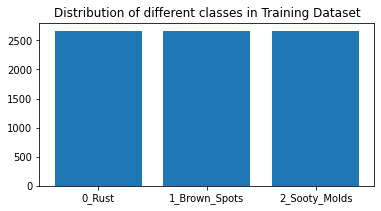

In [ ]:
nimgs={}
for i in LABELS:
  nimages=len(os.listdir('/content/drive/MyDrive/Graduation Project/phase 2/‏‏Dataset_CLQC/Dataset/Training_set/Stage_2'+'/'+i))
  nimgs[i]=nimages
plt.figure(figsize=(6, 3))
plt.bar(range(len(nimgs)), list(nimgs.values()), align='center')
plt.xticks(range(len(nimgs)), list(nimgs.keys()))
plt.title('Distribution of different classes in Training Dataset')
plt.show()

In [ ]:
img1 = load_img('/content/drive/MyDrive/Graduation Project/phase 2/‏‏Dataset_CLQC/Dataset/Training_set/Stage_2/0_Rust/0_R (1000).jpg') 
plt.suptitle("0_Rust Coffee Leaf", size=15) 
plt.axis('off')
_=plt.imshow(img1)

In [ ]:
img = load_img('/content/drive/MyDrive/Graduation Project/phase 2/‏‏Dataset_CLQC/Dataset/Training_set/Stage_2/1_Brown_Spots/1_BS (1).jpg')
plt.suptitle("1_Brown_Spots Coffee Leaf", size=15)
plt.axis('off')
_ = plt.imshow(img)

In [ ]:
img = load_img('/content/drive/MyDrive/Graduation Project/phase 2/‏‏Dataset_CLQC/Dataset/Training_set/Stage_2/2_Sooty_Molds/2_SM (1002).jpg')
plt.suptitle("2_Sooty_Molds Coffee Leaf", size=15)
plt.axis('off')
_ = plt.imshow(img)

## Implementation of EfficientNetB0 






16705208/16705208 [==============================] - 2s 0us/step
Model: "efficientnetb0"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling (Rescaling)          (None, 224, 224, 3)  0           ['input_1[0][0]']                
                                                                                                  
 normalization (Normalization)  (None, 224, 224, 3)  7           ['rescaling[0][0]']              
                                                                                                  
 tf.math.truediv (TF

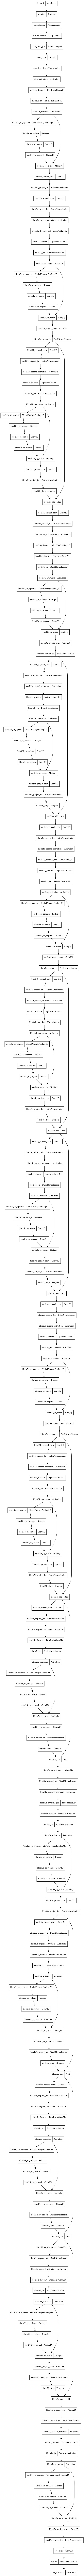

In [ ]:
EffNet = EfficientNetB0(
    include_top=False,
    weights="imagenet",
    input_shape=IMAGE_SIZE + [3]
    )
EffNet.summary()
keras.utils.plot_model(EffNet, "/content/drive/MyDrive/Graduation Project/phase 2/‏‏Dataset_CLQC/img/S2_EfficientNetB0_.png")

In [ ]:
model = EffNet.output
model = tf.keras.layers.GlobalAveragePooling2D()(model)
model = Dense(128, activation='relu')(model)
predictions = Dense(3, activation='softmax')(model)
model = Model(inputs=EffNet.input, outputs=predictions)

# Unfreeze the layers
for layer in model.layers[0:]:
 layer.trainable = True

In [ ]:
METRICS = [
      keras.metrics.TruePositives(name='tp'),
      keras.metrics.FalsePositives(name='fp'),
      keras.metrics.TrueNegatives(name='tn'),
      keras.metrics.FalseNegatives(name='fn'), 
      keras.metrics.BinaryAccuracy(name='accuracy'),
      keras.metrics.Precision(name='precision'),
      keras.metrics.Recall(name='recall'),
      keras.metrics.AUC(name='auc'),
      keras.metrics.AUC(name='prc', curve='PR'), # precision-recall curve
]

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer= 'adam' ,metrics=[METRICS])

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling (Rescaling)          (None, 224, 224, 3)  0           ['input_1[0][0]']                
                                                                                                  
 normalization (Normalization)  (None, 224, 224, 3)  7           ['rescaling[0][0]']              
                                                                                                  
 tf.math.truediv (TFOpLambda)   (None, 224, 224, 3)  0           ['normalization[0][0]']      

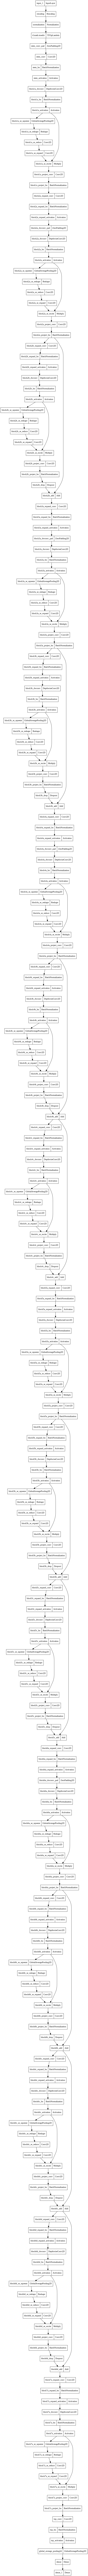

In [ ]:
model.summary()
keras.utils.plot_model(model, "/content/drive/MyDrive/Graduation Project/phase 2/‏‏Dataset_CLQC/img/S2_EfficientNetB0_final.png")

Let’s train our model

In [ ]:

checkpoint = ModelCheckpoint('EfficientNetb0_checkpoint_S2.h5', monitor='val_accuracy', 
                             verbose=1, 
                             save_best_only=True, 
                             save_weights_only=False, 
                             mode='auto')

early = EarlyStopping(monitor='val_loss', 
                      min_delta=0, 
                      patience=20, 
                      verbose=1, 
                      mode='auto')

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                           patience=5, mode='min', verbose=1,
                           min_lr=1e-5)

EfficientNetb0_classifier = model.fit(
  training_set,  
  validation_data=valid_set,
  epochs=300,
  steps_per_epoch=len(training_set),
  validation_steps=len(valid_set),
  verbose = True,
  callbacks=[checkpoint, early, reduce_lr])

Epoch 1/300
1000/1000 [==============================] - ETA: 0s - loss: 0.3451 - tp: 6809.0000 - fp: 1004.0000 - tn: 14996.0000 - fn: 1191.0000 - accuracy: 0.9085 - precision: 0.8715 - recall: 0.8511 - auc: 0.9669 - prc: 0.9392
Epoch 1: val_accuracy improved from -inf to 0.61768, saving model to EfficientNetb0_checkpoint_S2.h5
1000/1000 [==============================] - 5598s 6s/step - loss: 0.3451 - tp: 6809.0000 - fp: 1004.0000 - tn: 14996.0000 - fn: 1191.0000 - accuracy: 0.9085 - precision: 0.8715 - recall: 0.8511 - auc: 0.9669 - prc: 0.9392 - val_loss: 9.1380 - val_tp: 267.0000 - val_fp: 359.0000 - val_tn: 893.0000 - val_fn: 359.0000 - val_accuracy: 0.6177 - val_precision: 0.4265 - val_recall: 0.4265 - val_auc: 0.5756 - val_prc: 0.4230 - lr: 0.0010
Epoch 2/300
1000/1000 [==============================] - ETA: 0s - loss: 0.2192 - tp: 7241.0000 - fp: 689.0000 - tn: 15311.0000 - fn: 759.0000 - accuracy: 0.9397 - precision: 0.9131 - recall: 0.9051 - auc: 0.9856 - prc: 0.9730
Epoch 2:

##Save Model

In [ ]:
model.save('/content/drive/MyDrive/Graduation Project/phase 2/‏‏Dataset_CLQC/pre_trained/Stage2_CLQC_EfficientNetb0.h5')
print("Saved!!!")

model.save_weights('/content/drive/MyDrive/Graduation Project/phase 2/‏‏Dataset_CLQC/pre_trained/Stage2_CLQC_EfficientNetb0_Wig.h5')
print("Saved weights!!!")

Saved!!!
Saved weights!!!


# Evaluation
There are several ways to visualization for data:
* Plot Accuracy;
* Confusion Matrix;

**Plot Accuracy:**

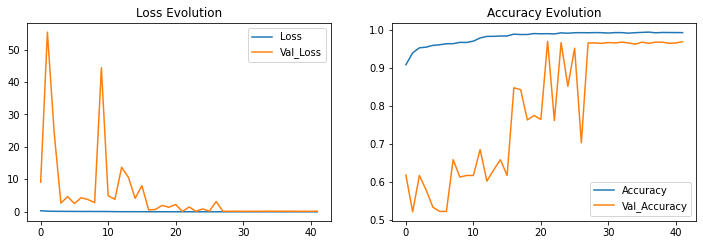

In [ ]:
plt.figure(figsize=(12, 8))
# accuracy
plt.subplot(2, 2, 1)
plt.plot(EfficientNetb0_classifier.history['loss'], label='Loss')
plt.plot(EfficientNetb0_classifier.history['val_loss'], label='Val_Loss')
plt.legend()
plt.title('Loss Evolution')
plt.savefig('acc1.png')
#loss
plt.subplot(2, 2, 2)
plt.plot(EfficientNetb0_classifier.history['accuracy'], label='Accuracy')
plt.plot(EfficientNetb0_classifier.history['val_accuracy'], label='Val_Accuracy')
plt.legend()
plt.title('Accuracy Evolution')
plt.savefig('loss1.png')

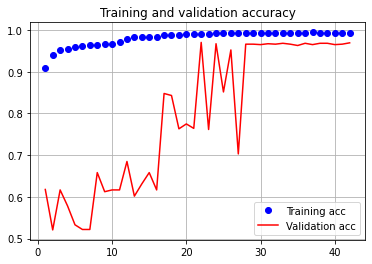

<Figure size 864x576 with 0 Axes>

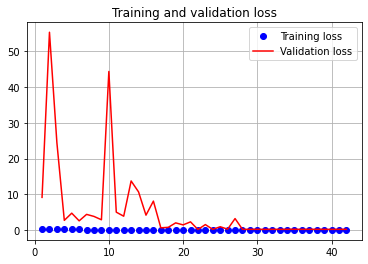

<Figure size 864x576 with 0 Axes>

In [ ]:
# accuracy
acc = EfficientNetb0_classifier.history['accuracy']
epochs = range(1, len(acc) + 1)
val_acc = EfficientNetb0_classifier.history['val_accuracy']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend(loc='lower right')
plt.grid()

plt.savefig('acc.png')
plt.figure(figsize=(12, 8))
plt.show()

#loss
loss = EfficientNetb0_classifier.history['loss']
val_loss = EfficientNetb0_classifier.history['val_loss']
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc='upper right')
plt.grid()

plt.savefig('loss.png')
plt.figure(figsize=(12, 8))
plt.show()

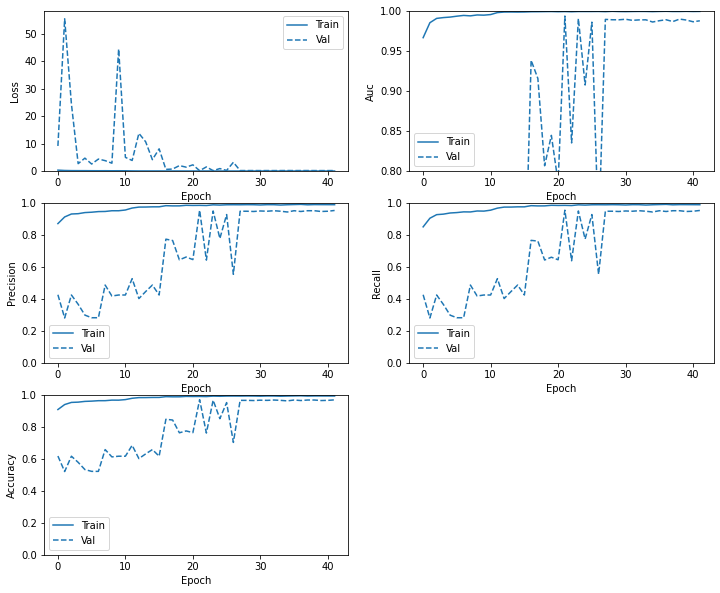

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
def plot_metrics(history):
  metrics =  ['loss', 'auc', 'precision', 'recall', 'accuracy']
  mpl.rcParams['figure.figsize'] = (12, 10)
  colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
  for n, metric in enumerate(metrics):
    name = metric.replace("_"," ").capitalize()
    plt.subplot(3,2,n+1)
    plt.plot(history.epoch,  history.history[metric], color=colors[0], label='Train')
    plt.plot(history.epoch, history.history['val_'+metric],
             color=colors[0], linestyle="--", label='Val')
    plt.xlabel('Epoch')
    plt.ylabel(name)
    if metric == 'loss':
      plt.ylim([0, plt.ylim()[1]])
    elif metric == 'auc':
      plt.ylim([0.8,1])
    elif metric == 'accuracy':
      plt.ylim([0,1])  
    else:
      plt.ylim([0,1])
 
    plt.legend()
plot_metrics(EfficientNetb0_classifier)

**Confusion Matrix:**

In [ ]:
import numpy as np
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / np.sum(cm).astype('float')
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Greens')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap) 
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

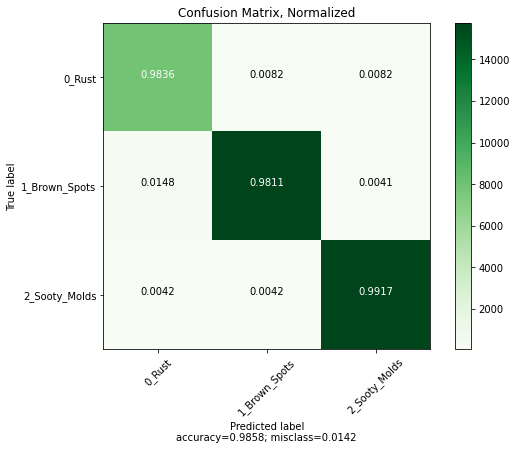

' plot_confusion_matrix(cm       = np.array([[ tp,  fn,  fn ], #those numbers are added manually  \n                                               [ fp,  tn,  fn],\n                                               [ fp,  fn,  tn]]), '

In [ ]:
#tp: 7934.0000 - fp: 66.0000 - tn: 15934.0000 - fn: 66.0000 - accuracy: 0.9945
plot_confusion_matrix(cm           = np.array([[ 7934.0000, 66.0000,  66.0000],
                                               [ 238.0000, 15762.0000, 66.0000],
                                               [ 66.0000, 66.0000,  15762.0000]]), 
                      normalize    = True,
                      target_names = ['0_Rust', '1_Brown_Spots', '2_Sooty_Molds'],
                      title        = "Confusion Matrix, Normalized")

""" plot_confusion_matrix(cm       = np.array([[ tp,  fn,  fn ], #those numbers are added manually  
                                               [ fp,  tn,  fn],
                                               [ fp,  fn,  tn]]), """
